In [232]:
import os
import sys
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [27]:
def LoadINPUT(file):
    D1 = pd.read_csv(file, index_col=0)
    return(D1.iloc[:-1,:], D1.loc['Group',:]) #return : (x, y) y~last column named 'Group' & [0.1/0.9]
    

In [185]:
file = "../examples/input_example.csv"
D_main = LoadINPUT(file)

In [255]:
def FeatureStats(data, label, pval = 0.05):    
    TaxaIDs = []
    Levens = []
    Equality = []
    TPs = []
    Avg = []
    SD = []

    for i in range(data.shape[0]):
        D_i = data.iloc[i,:]

        #shaP = stats.shapiro(D_i)[1]
        levP = stats.levene(D_i[label == 0.1], D_i[label == 0.9])[1]
        #print(shaP, levP)
        equl = (levP > pval)
        if(equl): #두 그룹의 분산이 같음 -> equal_var=True
            Pval = stats.ttest_ind(D_i[label == 0.1], D_i[label == 0.9], equal_var=True)[1]
        else:
            Pval = stats.ttest_ind(D_i[label == 0.1], D_i[label == 0.9], equal_var=False)[1]

        TaxaIDs.append(D_i.name)
        Levens.append(levP)
        Equality.append(equl)
        TPs.append(Pval)
        Avg.append(D_i.mean())
        SD.append(np.std(D_i))

    TestResDic = {'Taxa_ID':TaxaIDs, 'Leven_Pval':Levens, 'Equal':Equality, 'Ttest_Pval':TPs, 'Average':Avg, 'SD':SD}
    TestResDF = pd.DataFrame(TestResDic).sort_values('Average', ascending=False).reset_index().iloc[:,1:]
    
    return(TestResDF)

In [256]:
D_stat = FeatureStats(D_main[0], D_main[1])

In [243]:
def SelcFeatures(Fstat_data, Cutoff = 0.1): ## Cutoff unit: %
    Cutoffp = Cutoff*100
    #return(Fstat_data.iloc[:round(Fstat_data.shape[0]*Quantile),].Taxa_ID)
    return(Fstat_data[Fstat_data.Average > Cutoff].Taxa_ID)

In [250]:
Feas = SelcFeatures(D_stat)

In [258]:
def Xset(Data, Features):
    return(Data.loc[Features,:])

In [297]:
X = Xset(D_main[0], Feas)

In [ ]:
def TrainTestSplit(DF, ratio=0.3, Label=0.1, Compose=True):
    if Compose: ### 상대값으로 보정 샘플균 총량합 100
        for i in range(DF.shape[0]):
            DF.iloc[i,:] = (DF.iloc[i,:]/sum(DF.iloc[i,:]))*100
    DF['Group'] = Label
    import random
    xi = np.arange(DF.shape[0])
    np.random.seed(3492)
    np.random.shuffle(xi)
    xi = xi.tolist()

    Testx = DF.iloc[xi[:round(DF.shape[0]*ratio)],:]
    Trainx = DF.iloc[xi[round(DF.shape[0]*ratio):],:]
    return({'TEST':Testx, 'TRAIN':Trainx})

In [287]:
np.sqrt(len(vec_sec))

16.703293088490067

In [304]:
B = [0,0,0]

In [301]:
B.append(B)

In [307]:
[0 for x in range(n - len(vec_sec))] + 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [306]:
n - len(vec_sec)

10

In [313]:
int(np.sqrt(len(vec_sec)))+1

16

In [316]:
# Vec2IMG
def Vec2IMG(Vector):
    vec_sec = Vector
    INn = int(np.sqrt(len(vec_sec)))+1
    sampleID = vec_sec.name
    vec_sec = vec_sec.to_list()
    vec_sec.reverse()
    Dlist = [0 for x in range(n - len(vec_sec))] + vec_sec
    n = INn**2
    pos = np.array([0,0])
    POSlist = list()
    POSlist.append(pos)
    xx = [int(np.sqrt(n)-1)]
    for x in range(int(np.sqrt(n)-1), 0, -1):
        xx.append(x)
        xx.append(x)
    for i in range( ((int(np.sqrt(n)-1))*2) + 1 ):
        #print(pos)
        #print(i, POSlist)
        if i % 4 == 0:
            for j in range(xx[i]):
                pos = pos + [1,0]
                POSlist.append(pos)
        if i % 4 == 1:
            for j in range(xx[i]):
                pos = pos + [0,1]
                POSlist.append(pos)
        if i % 4 == 2:
            for j in range(xx[i]):
                pos = pos + [-1,0]
                POSlist.append(pos)
        if i % 4 == 3:
            for j in range(xx[i]):
                pos = pos + [0,-1]
                POSlist.append(pos)
    ARRY = np.zeros([INn,INn])
    for i in range(len(Dlist)):
        ARRY[POSlist[i].tolist()[0], POSlist[i].tolist()[1]] = Dlist[i]

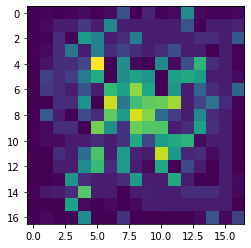

In [309]:
plt.imshow(ARRY)

In [278]:
len(Dlist)

279

In [273]:
ARRY

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

In [268]:
def Vec2IMG(DFx, INn = 20):
    dx = DFx.iloc[:,:-1]
    for i in range(dx.shape[0]):
        vec_sec = dx.iloc[i,:]
        sampleID = vec_sec.name
        vec_sec = vec_sec.to_list()
        vec_sec.reverse()
        Dlist = vec_sec
        n = INn**2
        pos = np.array([0,0])
        POSlist = list()
        POSlist.append(pos)
        xx = [int(np.sqrt(n)-1)]
        for x in range(int(np.sqrt(n)-1), 0, -1):
            xx.append(x)
            xx.append(x)
        for i in range( ((int(np.sqrt(n)-1))*2) + 1 ):
            #print(pos)
            #print(i, POSlist)
            if i % 4 == 0:
                for j in range(xx[i]):
                    pos = pos + [1,0]
                    POSlist.append(pos)
            if i % 4 == 1:
                for j in range(xx[i]):
                    pos = pos + [0,1]
                    POSlist.append(pos)
            if i % 4 == 2:
                for j in range(xx[i]):
                    pos = pos + [-1,0]
                    POSlist.append(pos)
            if i % 4 == 3:
                for j in range(xx[i]):
                    pos = pos + [0,-1]
                    POSlist.append(pos)
        ARRY = np.zeros([INn,INn])
        for i in range(len(Dlist)):
            ARRY[POSlist[i].tolist()[0], POSlist[i].tolist()[1]] = Dlist[i]
        return(ARRY)
        #plt.imsave(outDir + "/" + sampleID + ".png", ARRY)